<b>Predict and understand which customers will become delinquent?</b>

<u>Features include:</u>
   
    1. InvoiceID            
    2. InvoiceSequenceID    
    3. OMONumber            
    4. InvoiceBillAmount    
    5. InvoicePayAmount     
    6. SalesTax             
    7. AdminFee             
    8. PaymentID            
    9. ChargeAmount         
    10. Payment Term         
    11. InvoiceStatus        
    12. InvoiceDate          
    13. DateTransferDoF 
    
 <u> New features added </u>
     
     1. Delay (abs(DateTransferDoF - InvoiceDate))
     2. Cust_OnTimePayments (For each customer ID (OMONumber), count how many On-Time Payments)
     3. Cust_TotalInvoices  (Count of Invoices for each customer ID (OMONumber))
     4. Cust_PercentOnTime  (Percent of On-Time Payments for each customer ID (OMONumber))
    
<u>Target variable:</u>

    14. DaysDel (which consists of '90DayDel', '60DayDel', '30DayDel', 'On-Time', '90PDayDel' )     
    
Its a multi-lable classifcation problem


This notebook also includes some basic questions that can be addressed from basic data analysis

<u>Importing necessary modules</u>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import featuretools as ft
from scipy import stats
from datetime import datetime

In [2]:
train_set = pd.read_csv('Train_set.csv', parse_dates=['InvoiceDate', 'DateTransferDoF'])
test_set = pd.read_csv('Test_set.csv', parse_dates=['InvoiceDate', 'DateTransferDoF'])

In [3]:
#combining both the dataframes
frames = [train_set, test_set]
df_full = pd.concat(frames)

In [4]:
df_full[df_full['OMONumber'] == 'E903640'].sort_values(['InvoiceID'])

,InvoiceID,InvoiceSequenceID,OMONumber,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,PaymentID,ChargeAmount,Payment Term,InvoiceStatus,InvoiceDate,DateTransferDoF,DaysDel
6442,1,1627736,E903640,759.17,759.17,30.37,113.88,865528.0,903.42,60,NotDispute,2008-12-08,2008-09-19,On-Time
6443,2,1629094,E903640,3635.21,2121.31,84.85,318.20,866880.0,2524.36,60,NotDispute,2008-08-20,2008-09-19,On-Time
6453,3,1670640,E903640,408.42,-7184.47,-287.38,0.00,NaN,0.00,60,NotDispute,2008-11-13,NaT,90PDayDel
6454,4,1670641,E903640,1115.00,-6069.47,-242.78,0.00,NaN,0.00,60,NotDispute,2008-11-13,NaT,90PDayDel
6452,5,1685408,E903640,4376.60,-1692.87,-67.71,0.00,NaN,0.00,60,NotDispute,2008-12-31,NaT,90PDayDel
6451,6,1685409,E903640,899.70,-793.17,-31.73,0.00,NaN,0.00,60,NotDispute,2008-12-31,NaT,90PDayDel
6444,7,1700114,E903640,3174.16,2380.99,95.24,357.15,933749.0,2833.38,60,NotDispute,2009-01-23,2009-03-20,On-Time
6446,8,1729095,E903640,5976.92,824.62,32.98,123.69,970550.0,981.29,60,NotDispute,2009-03-25,2009-05-20,On-Time
6445,9,1729103,E903640,952.82,952.82,38.11,142.92,970549.0,1133.85,60,NotDispute,2009-04-20,2009-05-20,On-Time
6447,10,1743652,E903640,745.18,745.18,29.81,111.78,976028.0,886.77,60,NotDispute,2009-04-23,2009-06-19,On-Time


In [5]:
df_full[df_full['InvoicePayAmount'] < 0].groupby(['DaysDel', 'OMONumber']).agg({'InvoiceID' : np.count_nonzero, 'InvoiceBillAmount' : np.sum, 
                                                                               'InvoicePayAmount': np.sum})

InvoiceID  InvoiceBillAmount  InvoicePayAmount
DaysDel   OMONumber                                                
90PDayDel E318489            1              70.00            -50.00
          E800608            4             175.81           -211.55
          E802763            1             644.20             -3.70
          E804733            4            5364.63          -6156.03
          E808247            1              50.61             -9.39
...                        ...                ...               ...
          EF02980           16            4643.98         -46925.31
          EF03169            1              56.45            -25.24
          EF07836            1              34.69            -17.73
          EF08447            1              30.42          -1119.55
          EG19262            3             176.88           -166.33

[66 rows x 3 columns]

In [6]:
pd.DataFrame(df_full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12116 entries, 0 to 1157
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceID          12116 non-null  int64         
 1   InvoiceSequenceID  12116 non-null  object        
 2   OMONumber          12116 non-null  object        
 3   InvoiceBillAmount  12116 non-null  float64       
 4   InvoicePayAmount   12116 non-null  float64       
 5   SalesTax           12116 non-null  float64       
 6   AdminFee           12116 non-null  float64       
 7   PaymentID          11644 non-null  float64       
 8   ChargeAmount       12116 non-null  float64       
 9   Payment Term       12116 non-null  int64         
 10  InvoiceStatus      12116 non-null  object        
 11  InvoiceDate        12116 non-null  datetime64[ns]
 12  DateTransferDoF    11579 non-null  datetime64[ns]
 13  DaysDel            12116 non-null  object        
dtypes: date

""


In [7]:
df_full['InvoiceID'] = df_full.InvoiceID.astype(str)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12116 entries, 0 to 1157
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceID          12116 non-null  object        
 1   InvoiceSequenceID  12116 non-null  object        
 2   OMONumber          12116 non-null  object        
 3   InvoiceBillAmount  12116 non-null  float64       
 4   InvoicePayAmount   12116 non-null  float64       
 5   SalesTax           12116 non-null  float64       
 6   AdminFee           12116 non-null  float64       
 7   PaymentID          11644 non-null  float64       
 8   ChargeAmount       12116 non-null  float64       
 9   Payment Term       12116 non-null  int64         
 10  InvoiceStatus      12116 non-null  object        
 11  InvoiceDate        12116 non-null  datetime64[ns]
 12  DateTransferDoF    11579 non-null  datetime64[ns]
 13  DaysDel            12116 non-null  object        
dtypes: date

<b> feature extraction </b>

In [8]:
#creating the primary key
df_full['ID'] = df_full['InvoiceID'] + df_full['InvoiceSequenceID']

In [9]:
df_full['ID'].value_counts()

11           42
16.33E+14    21
26.33E+14    20
36.33E+14    19
66.33E+14    17
             ..
102095932     1
112100298     1
122117080     1
11992662      1
1EE07683      1
Name: ID, Length: 11823, dtype: int64

In [10]:
# difference in the InvoiceDate and DateTransferDoF 
df_full['Delay'] = np.abs((df_full['DateTransferDoF'] - df_full['InvoiceDate']) / np.timedelta64(1,'D'))


In [11]:
# create a new variable with customerID (OMONumber) as a single customer can have multiple invoices.
# Therefore, it is likely

df_full.groupby(['DaysDel']). agg({'Delay': [np.mean, np.std, np.min, np.max]})

Delay                          
                 mean         std  amin    amax
DaysDel                                        
30DayDel    85.305987   65.882216   1.0   405.0
60DayDel   106.757447   67.465109   2.0   407.0
90DayDel   129.511278   69.346324  11.0   433.0
90PDayDel  292.196249  323.595432  10.0  3817.0
On-Time     72.921579   68.503253   1.0   373.0

In [12]:
pd.DataFrame(df_full.groupby('OMONumber').DaysDel.value_counts())

DaysDel
OMONumber DaysDel           
D000027   90PDayDel        1
D000129   90PDayDel        2
          On-Time          1
D000136   90PDayDel        1
D000187   90PDayDel        1
...                      ...
EH09071   90PDayDel        1
EH09097   90PDayDel        1
EH09106   90PDayDel        1
EH09222   90PDayDel        1
EH09532   On-Time          1

[8220 rows x 1 columns]

In [13]:
test = df_full[df_full['OMONumber'] == 'E800171'].DaysDel.value_counts().to_dict()
print(test.get('On-Time'))
print(sum(x for x in list(test.values())))

7
7


In [14]:
OMONumber_2 = []
Cust_OnTimePayments = []
Cust_TotalInvoices = []
Cust_PercentOnTime= []
rowno = []

count=0
for custID in df_full['OMONumber']:
    custID_info = df_full[df_full['OMONumber'] == custID].DaysDel.value_counts().to_dict()
    cust_On_Time = custID_info.get('On-Time', 0)
    cust_Invoices = sum(x for x in list(custID_info.values()))
    percent_On_Time = cust_On_Time/cust_Invoices
    #lst = [custID, cust_On_Time, cust_Invoices, percent_On_Time]
    OMONumber_2.append(custID)
    Cust_OnTimePayments.append(cust_On_Time)
    Cust_TotalInvoices.append(cust_Invoices)
    Cust_PercentOnTime.append(percent_On_Time)
    rowno.append(count)
    count+=1


df_OMO = pd.concat([pd.DataFrame(OMONumber_2), pd.DataFrame(Cust_OnTimePayments), pd.DataFrame(Cust_TotalInvoices), pd.DataFrame(Cust_PercentOnTime), 
                   pd.DataFrame(rowno)], axis=1)
    


In [15]:
df_OMO.columns = ['OMONumber', 'Cust_OnTimePayments', 'Cust_TotalInvoices', 'Cust_PercentOnTime', 'rowno']
df_OMO.head()

,OMONumber,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime,rowno
0,E701189,0,1,0.0,0
1,E704942,0,1,0.0,1
2,E710029,0,1,0.0,2
3,E712562,0,1,0.0,3
4,E712358,0,1,0.0,4


In [16]:
df_full['rowno'] = [x for x in range(len(df_full))]

In [17]:
print(df_OMO.head())
print(df_full.head())

  OMONumber  Cust_OnTimePayments  Cust_TotalInvoices  Cust_PercentOnTime  \
0   E701189                    0                   1                 0.0   
1   E704942                    0                   1                 0.0   
2   E710029                    0                   1                 0.0   
3   E712562                    0                   1                 0.0   
4   E712358                    0                   1                 0.0   

   rowno  
0      0  
1      1  
2      2  
3      3  
4      4  
  InvoiceID InvoiceSequenceID OMONumber  InvoiceBillAmount  InvoicePayAmount  \
0         1           E701189   E701189              41.25             41.25   
1         1           E704942   E704942              14.00             14.00   
2         1           E710029   E710029               7.50              7.50   
3         1           E712562   E712562             888.70            888.70   
4         1           E712358   E712358              12.00             12.00 

In [18]:
df_full_modified = pd.merge(df_full, df_OMO, on='rowno')

In [19]:
df_full_modified.head()

,InvoiceID,InvoiceSequenceID,OMONumber_x,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,PaymentID,ChargeAmount,Payment Term,...,InvoiceDate,DateTransferDoF,DaysDel,ID,Delay,rowno,OMONumber_y,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime
0,1,E701189,E701189,41.25,41.25,3.56,15.0,612973.0,59.81,30,...,2006-07-20,2006-10-20,90DayDel,1E701189,92.0,0,E701189,0,1,0.0
1,1,E704942,E704942,14.00,14.00,1.21,15.0,614364.0,30.21,30,...,2006-08-25,2006-11-16,60DayDel,1E704942,83.0,1,E704942,0,1,0.0
2,1,E710029,E710029,7.50,7.50,0.65,15.0,633713.0,23.15,30,...,2006-10-10,2007-01-19,90DayDel,1E710029,101.0,2,E710029,0,1,0.0
3,1,E712562,E712562,888.70,888.70,76.65,75.0,635968.0,1040.35,30,...,2006-11-29,2007-01-19,30DayDel,1E712562,51.0,3,E712562,0,1,0.0
4,1,E712358,E712358,12.00,12.00,1.04,15.0,644697.0,28.04,30,...,2006-10-11,2007-02-20,90DayDel,1E712358,132.0,4,E712358,0,1,0.0


In [20]:
df_full_modified['Cust_PercentOnTime'].value_counts()

0.000000    6755
1.000000    1948
0.500000     250
0.250000     128
0.833333     126
            ... 
0.545455      11
0.727273      11
0.700000      10
0.111111       9
0.714286       7
Name: Cust_PercentOnTime, Length: 88, dtype: int64

In [21]:
df_OMO['Cust_PercentOnTime'].value_counts()

0.000000    6755
1.000000    1948
0.500000     250
0.250000     128
0.833333     126
            ... 
0.545455      11
0.727273      11
0.700000      10
0.111111       9
0.714286       7
Name: Cust_PercentOnTime, Length: 88, dtype: int64

<u>missing data:</u>

In [22]:
#lets see what percentage of the data is missing
t = df_full_modified.isnull().sum()/len(df_full_modified) * 100
missing_feat= pd.DataFrame()
missing_feat["feature"] = df_full_modified.columns
missing_feat["missing percentage"] = t.values

missing_feat[missing_feat['missing percentage'] > 0]
#pd.DataFrame(t, columns=["feature", "missing feature percentage"])
#pd.DataFrame(train_set.isnull().sum()/len(train_set) * 100)

#The missing data is less than 5% of the entire training set, therefore can be dropped.

,feature,missing percentage
7,PaymentID,3.895675
12,DateTransferDoF,4.432156
15,Delay,4.432156


<u>Descriptive statistics:</u>

ALso it can be noticed that InvoicePayamount and Sales tax are going negative in few places as min values are negative

In [23]:
df_full_modified.describe()

,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,PaymentID,ChargeAmount,Payment Term,Delay,rowno,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime
count,1.211600e+04,1.211600e+04,12116.000000,12116.000000,1.164400e+04,1.211600e+04,12116.000000,11579.000000,12116.000000,12116.000000,12116.000000,12116.000000
mean,1.074671e+03,9.907632e+02,50.155202,128.272121,1.114382e+06,1.178705e+03,47.398069,114.447621,6057.500000,3.031446,6.514856,0.313635
std,1.899398e+04,1.891141e+04,331.536840,768.236928,6.728905e+05,1.946212e+04,13.210881,149.618539,3497.732265,5.924069,8.845015,0.411022
min,0.000000e+00,-7.184470e+03,-287.380000,0.000000,8.900000e+01,-2.011600e+02,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.246000e+01,5.000000e+01,2.910000,15.000000,5.298198e+05,6.913000e+01,30.000000,49.000000,3028.750000,0.000000,1.000000,0.000000
50%,1.500000e+02,1.216700e+02,7.630000,34.160000,1.113108e+06,1.600550e+02,45.000000,73.000000,6057.500000,0.000000,1.000000,0.000000
75%,5.000000e+02,4.750000e+02,28.935000,75.000000,1.709481e+06,6.119400e+02,60.000000,135.000000,9086.250000,3.000000,12.000000,0.769231
max,1.544834e+06,1.544834e+06,20661.000000,25000.000000,2.162396e+06,1.569834e+06,60.000000,3817.000000,12115.000000,31.000000,59.000000,1.000000


<u>Rows containing missing data are dropped as they corresond to <5%</u>

In [24]:
df_full_modified = df_full_modified.dropna()
df_full_modified = df_full_modified.reset_index(drop=True)                           
df_full_modified.isnull().sum()/len(df_full_modified) * 100

InvoiceID              0.0
InvoiceSequenceID      0.0
OMONumber_x            0.0
InvoiceBillAmount      0.0
InvoicePayAmount       0.0
SalesTax               0.0
AdminFee               0.0
PaymentID              0.0
ChargeAmount           0.0
Payment Term           0.0
InvoiceStatus          0.0
InvoiceDate            0.0
DateTransferDoF        0.0
DaysDel                0.0
ID                     0.0
Delay                  0.0
rowno                  0.0
OMONumber_y            0.0
Cust_OnTimePayments    0.0
Cust_TotalInvoices     0.0
Cust_PercentOnTime     0.0
dtype: float64

<u>Descriptive statistics</u>

When we dropped missing values, we also took care of the values that are negative (See below)


In [25]:
df_full_modified.describe()

,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,PaymentID,ChargeAmount,Payment Term,Delay,rowno,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime
count,1.157900e+04,1.157900e+04,11579.000000,11579.000000,1.157900e+04,1.157900e+04,11579.000000,11579.000000,11579.000000,11579.000000,11579.000000,11579.000000
mean,1.077596e+03,1.020057e+03,51.746437,130.531629,1.109822e+06,1.202335e+03,47.381035,114.447621,6049.865705,3.045859,6.405994,0.319521
std,1.940102e+04,1.931908e+04,337.705526,780.554403,6.714098e+05,1.988253e+04,13.216362,149.618539,3506.275422,5.960084,8.806054,0.415414
min,6.900000e-01,3.200000e-01,0.000000,0.000000,8.900000e+01,1.000000e+00,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.200000e+01,5.036500e+01,3.320000,15.000000,5.286485e+05,7.444000e+01,30.000000,49.000000,2992.500000,0.000000,1.000000,0.000000
50%,1.500000e+02,1.370300e+02,8.410000,37.500000,1.101696e+06,1.812300e+02,45.000000,73.000000,6050.000000,0.000000,1.000000,0.000000
75%,5.000000e+02,4.850000e+02,30.320000,75.000000,1.706605e+06,6.216250e+02,60.000000,135.000000,9085.500000,3.000000,11.000000,0.800000
max,1.544834e+06,1.544834e+06,20661.000000,25000.000000,2.160988e+06,1.569834e+06,60.000000,3817.000000,12115.000000,31.000000,59.000000,1.000000


<b><u>Understanding the data <b></u>

In [26]:
df_count = pd.DataFrame(df_full_modified.groupby(['DaysDel'])['DaysDel'].count()/len(df_full_modified) * 100)
df_count.columns = ['Percentage']
df_count

,Percentage
DaysDel,
30DayDel,31.159858
60DayDel,16.236290
90DayDel,6.891787
90PDayDel,12.894032
On-Time,32.818033


31% of the invoices are paid on time. Therefore it is important to have customer risk predictive tool

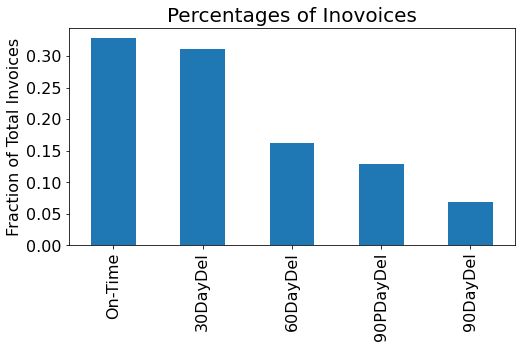

In [27]:
df_full_modified['DaysDel'].value_counts(normalize=True).plot.bar(figsize=(8,4), fontsize=16) 
plt.title('Percentages of Inovoices', fontsize = 20)
plt.ylabel('Fraction of Total Invoices', fontsize=16)
plt.show()

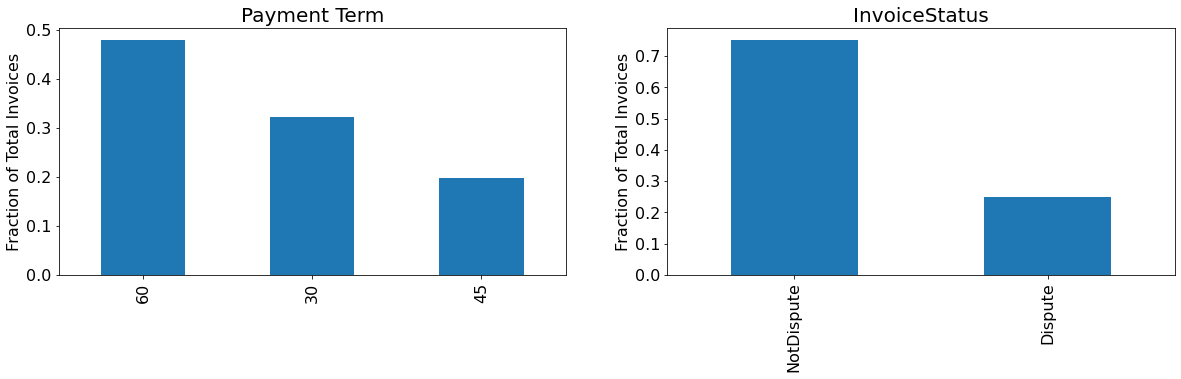

In [28]:
plt.figure(1) 
plt.subplot(221) 
df_full_modified['Payment Term'].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize=16) 
plt.title('Payment Term', fontsize=20)
plt.ylabel('Fraction of Total Invoices', fontsize=16)
plt.subplot(222) 
df_full_modified['InvoiceStatus'].value_counts(normalize=True).plot.bar(fontsize=16)
plt.title('InvoiceStatus', fontsize=20)
plt.ylabel('Fraction of Total Invoices', fontsize=16)
plt.show()

- majority of the customers opt for 60-month PayTerm option
- while only 30% invoices are on dispute

<AxesSubplot:xlabel='Payment Term,DaysDel'>

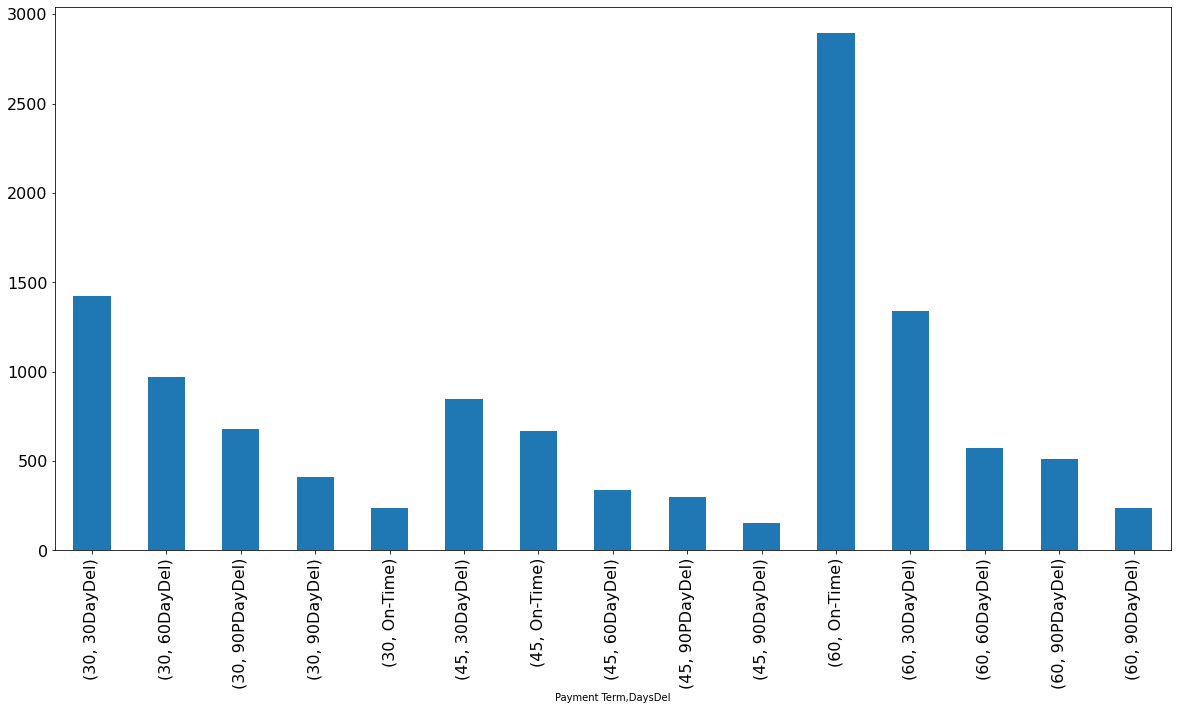

In [29]:
df_full_modified.groupby(['Payment Term'])['DaysDel'].value_counts().plot.bar(figsize=(20,10), fontsize=16)

- it is also true that the majority of the Invoices are paid on time also opt 60-month payterm option

Text(0.5, 1.0, 'Delinquincy dependence on Bills')

<Figure size 432x288 with 0 Axes>

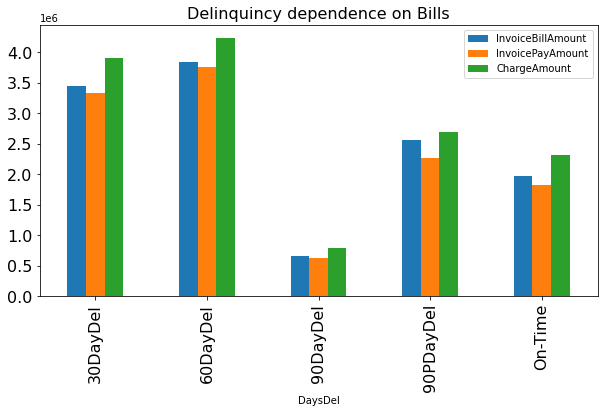

In [30]:
plt.figure(1) 
#plt.subplot(221) 
df_full_modified.groupby(['DaysDel']).agg({'InvoiceBillAmount': np.sum, 'InvoicePayAmount': np.sum, 
                                 'ChargeAmount': np.sum}).plot.bar(figsize=(10,5), fontsize=16)
plt.title('Delinquincy dependence on Bills', fontsize=16)

<AxesSubplot:xlabel='InvoiceBillAmount', ylabel='InvoicePayAmount'>

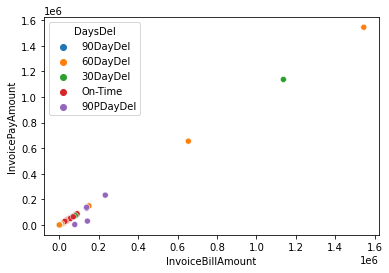

In [31]:
sns.scatterplot(data=df_full_modified, x="InvoiceBillAmount", y="InvoicePayAmount", hue="DaysDel")

<AxesSubplot:xlabel='DaysDel'>

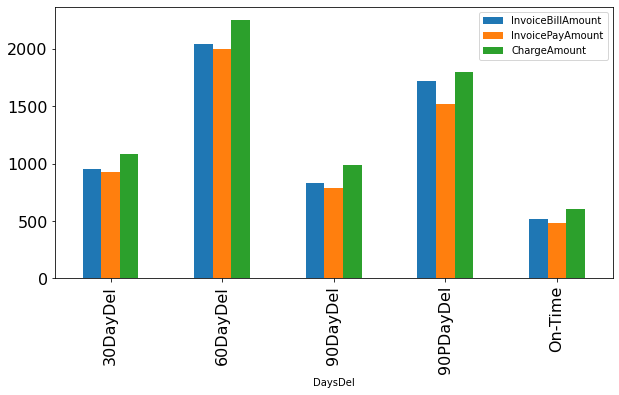

In [32]:
df_full_modified.groupby(['DaysDel']).agg({'InvoiceBillAmount': np.mean, 'InvoicePayAmount': np.mean, 
                                 'ChargeAmount': np.mean}).plot.bar(figsize=(10,5), fontsize=16)

- On average Invoices that are paid on time has a smaller amount to pay when compared to the Invoices that are defaulting.

<AxesSubplot:xlabel='DaysDel,Payment Term'>

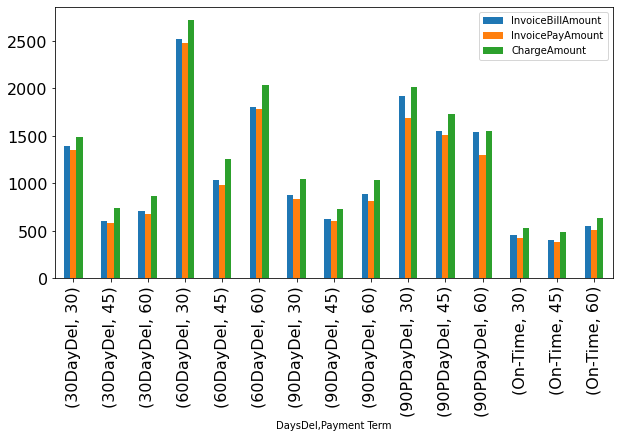

In [33]:
df_full_modified.groupby(['DaysDel', 'Payment Term']).agg({'InvoiceBillAmount': np.mean, 'InvoicePayAmount': np.mean, 
                                 'ChargeAmount': np.mean}).plot.bar(figsize=(10,5), fontsize=16)

- Regardless of the Payment Term, Customers who have smaller amounts to pay are majorly On-Time.

In [34]:
df_full_modified.iloc[np.where(df_full_modified.Cust_TotalInvoices == 59)]

,InvoiceID,InvoiceSequenceID,OMONumber_x,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,PaymentID,ChargeAmount,Payment Term,...,InvoiceDate,DateTransferDoF,DaysDel,ID,Delay,rowno,OMONumber_y,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime
2022,1,44556,EF04458,1591.20,1591.20,71.60,636.48,1996962.0,2299.28,60,...,2014-12-08,2014-11-20,60DayDel,144556,18.0,2102,EF04458,13,59,0.220339
2023,7,44760,EF04458,2380.89,2380.89,107.14,952.36,2086152.0,3440.39,60,...,2014-12-15,2015-05-17,90PDayDel,744760,153.0,2103,EF04458,13,59,0.220339
2024,2,44613,EF04458,1020.92,1020.92,45.94,408.37,2086153.0,1475.23,60,...,2014-08-09,2015-05-17,90PDayDel,244613,281.0,2104,EF04458,13,59,0.220339
2025,6,44758,EF04458,1885.92,1885.92,84.87,754.37,2086154.0,2725.16,60,...,2014-08-12,2015-05-17,90PDayDel,644758,278.0,2105,EF04458,13,59,0.220339
2026,5,44748A,EF04458,3077.48,3077.48,138.49,1230.99,2086155.0,4446.96,60,...,2014-11-25,2015-05-17,90PDayDel,544748A,173.0,2106,EF04458,13,59,0.220339
2027,3,44677A,EF04458,776.21,776.21,34.93,310.48,2086156.0,1121.62,60,...,2014-09-10,2015-05-17,90PDayDel,344677A,249.0,2107,EF04458,13,59,0.220339
2028,8,44768A,EF04458,1868.14,1868.14,84.07,747.26,2087419.0,2699.47,60,...,2014-12-24,2015-06-19,90PDayDel,844768A,177.0,2108,EF04458,13,59,0.220339
2029,4,44717A,EF04458,2599.62,2599.62,116.98,1039.85,2087420.0,3756.45,60,...,2014-11-11,2015-06-19,90PDayDel,444717A,220.0,2109,EF04458,13,59,0.220339
2030,11,78457,EF04458,852.87,852.87,38.38,341.15,2102235.0,1232.40,60,...,2015-04-14,2015-07-20,60DayDel,1178457,97.0,2110,EF04458,13,59,0.220339
2031,13,74574,EF04458,432.44,432.44,19.46,172.98,2102236.0,624.88,60,...,2015-05-20,2015-07-20,30DayDel,1374574,61.0,2111,EF04458,13,59,0.220339


(array([7041.,  585.,  633., 1295.,  876.,  155.,   58.,  195.,  201.,
          28.,  392.,   65.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,   55.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ,
        32.9, 35.8, 38.7, 41.6, 44.5, 47.4, 50.3, 53.2, 56.1, 59. ]),
 <BarContainer object of 20 artists>)

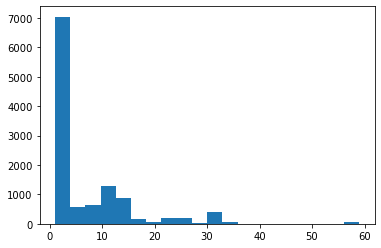

In [35]:
plt.hist(df_full_modified['Cust_TotalInvoices'], bins=20)

<AxesSubplot:xlabel='Cust_TotalInvoices'>

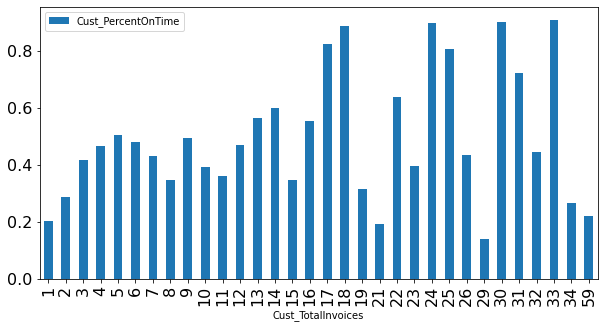

In [36]:
df_full_modified.groupby(['Cust_TotalInvoices']).agg({'Cust_PercentOnTime': np.mean}).plot.bar(figsize=(10,5), fontsize=16)
                                                   

In [40]:
#df_full_modified[df_full_modified['OMONumber_x' == ]].groupby()

<AxesSubplot:xlabel='Cust_TotalInvoices'>

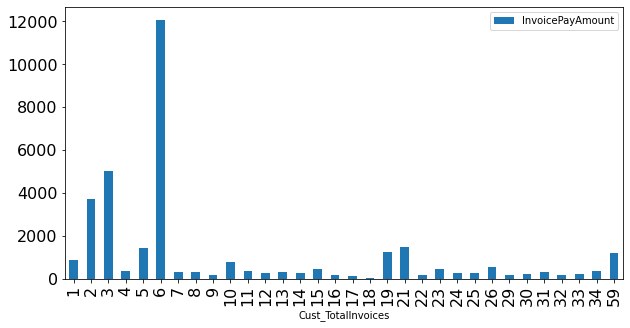

In [41]:
df_full_modified.groupby(['Cust_TotalInvoices']).agg({'InvoicePayAmount': np.mean}).plot.bar(figsize=(10,5), fontsize=16)
                                                   

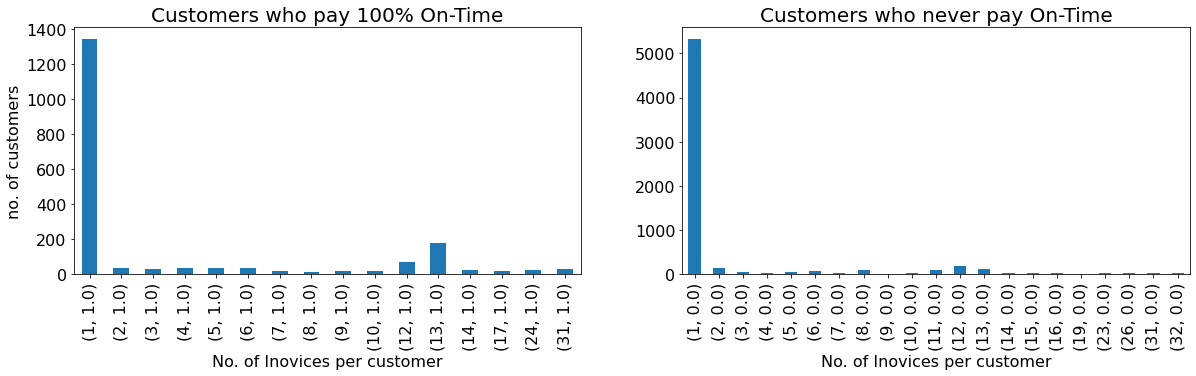

In [42]:
plt.figure(1) 
plt.subplot(221) 
df_full_modified[df_full_modified['Cust_PercentOnTime'] ==1 ].groupby(
    ['Cust_TotalInvoices'])['Cust_PercentOnTime'].value_counts(normalize=False).plot.bar(figsize = (20,10), fontsize=16)
plt.title('Customers who pay 100% On-Time', fontsize=20)
plt.ylabel('no. of customers', fontsize=16)
plt.xlabel('No. of Inovices per customer', fontsize=16)
plt.subplot(222) 
df_full_modified[df_full_modified['Cust_PercentOnTime'] ==0 ].groupby(
    ['Cust_TotalInvoices'])['Cust_PercentOnTime'].value_counts(normalize=False).plot.bar(figsize = (20,10), fontsize=16)
plt.title('Customers who never pay On-Time', fontsize=20)
plt.xlabel('No. of Inovices per customer', fontsize=16)
plt.show()


In [43]:
df_full_modified[df_full_modified['Cust_PercentOnTime'] == 0].groupby(['Cust_TotalInvoices'])['Cust_PercentOnTime'].value_counts()

Cust_TotalInvoices  Cust_PercentOnTime
1                   0.0                   5322
2                   0.0                    144
3                   0.0                     50
4                   0.0                     38
5                   0.0                     52
6                   0.0                     70
7                   0.0                     32
8                   0.0                     98
9                   0.0                      9
10                  0.0                     29
11                  0.0                     92
12                  0.0                    183
13                  0.0                    115
14                  0.0                     27
15                  0.0                     25
16                  0.0                     28
19                  0.0                     19
23                  0.0                     23
26                  0.0                     26
31                  0.0                     24
32                  0

<u> Determining Outliers </u>

We can use Z-score to determine outliers, however Z-score technique can be applied
only when the features are normally distributed. Lets determine how their distributions are?

In [44]:
# lets determine skewness and kurtosis of our features
#col = ['Features', 'Skewness']
print("skewness present in the data is: ")
print(pd.DataFrame(df_full_modified.skew(), columns=['skewness']))
print( " ")
print("kurtosis present in the data is: ")
pd.DataFrame(df_full_modified.kurtosis(), columns=['kurtosis'])

skewness present in the data is: 
                      skewness
InvoiceID             3.156686
InvoiceBillAmount    64.505434
InvoicePayAmount     65.285471
SalesTax             32.818874
AdminFee             23.899031
PaymentID             0.003751
ChargeAmount         63.504017
Payment Term         -0.314290
Delay                 8.271398
rowno                 0.003611
Cust_OnTimePayments   2.606134
Cust_TotalInvoices    2.262339
Cust_PercentOnTime    0.747128
 
kurtosis present in the data is: 


C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\1352606051.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(pd.DataFrame(df_full_modified.skew(), columns=['skewness']))
C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\1352606051.py:7: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(df_full_modified.kurtosis(), columns=['kurtosis'])


,kurtosis
InvoiceID,13.988584
InvoiceBillAmount,4590.457550
InvoicePayAmount,4669.305846
SalesTax,1575.332424
AdminFee,689.581848
PaymentID,-1.241287
ChargeAmount,4470.449560
Payment Term,-1.639480
Delay,125.179593
rowno,-1.203655


As can be noticed from the skewness and kurtosis values, majority of the features are skewed right
and therefore are not normally distributed.

<u>boxcox scaling to reduce the skewness:</u>

The following transformations were applied 
1. Log transform
2. Square root transform
3. Boxcox transform

Boxcox transformation gave a reduced skewness on the data

In [45]:
col_num_list = []
for col in df_full_modified.columns:
    if df_full_modified[col].dtype in ["int64","float64"]:
        col_num_list.append(col)
        
print(col_num_list)
col_num_list.remove('rowno')
col_num_list.remove('PaymentID')
col_num_list.remove('Payment Term')
print(col_num_list)

['InvoiceBillAmount', 'InvoicePayAmount', 'SalesTax', 'AdminFee', 'PaymentID', 'ChargeAmount', 'Payment Term', 'Delay', 'rowno', 'Cust_OnTimePayments', 'Cust_TotalInvoices', 'Cust_PercentOnTime']
['InvoiceBillAmount', 'InvoicePayAmount', 'SalesTax', 'AdminFee', 'ChargeAmount', 'Delay', 'Cust_OnTimePayments', 'Cust_TotalInvoices', 'Cust_PercentOnTime']


In [46]:
def plots2(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(pd.Series(df[var]))
    plt.title('before transformation of' + str(col))
    
    plt.subplot(122)
    p1 = stats.boxcox(df[var]+1)[0]
    sns.kdeplot(pd.Series(p1))
    plt.title('after transformation of'+ str(col))

KDE plots to demonstrate the transformation of the data to make it normal like distribution

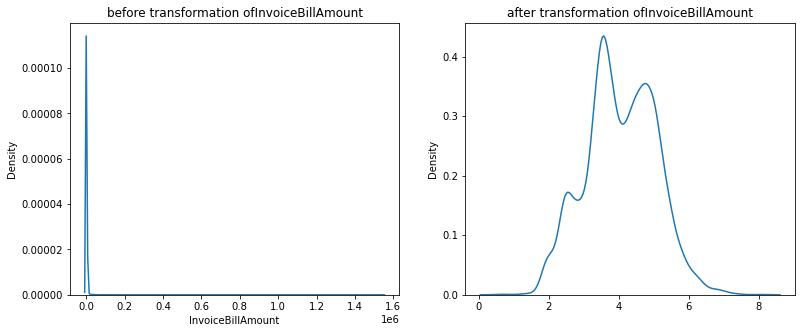

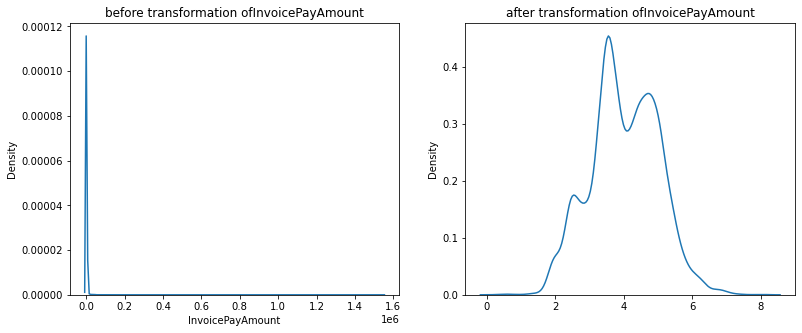

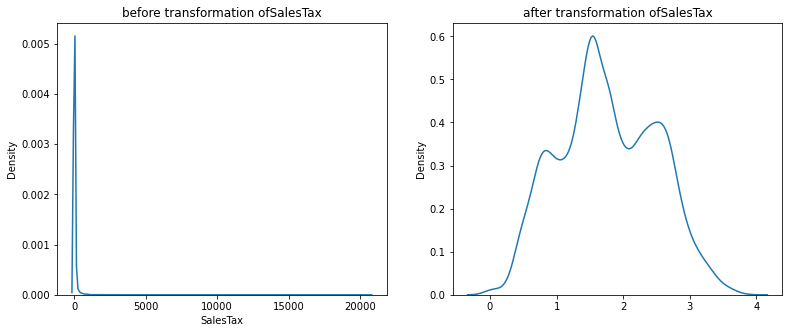

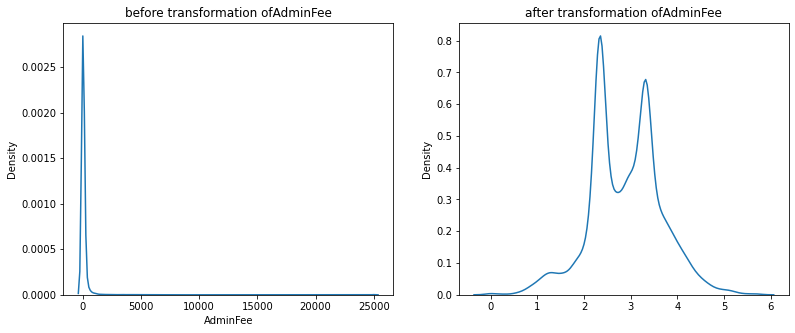

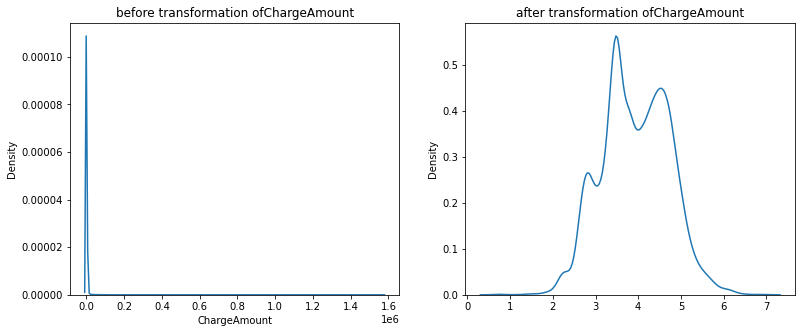

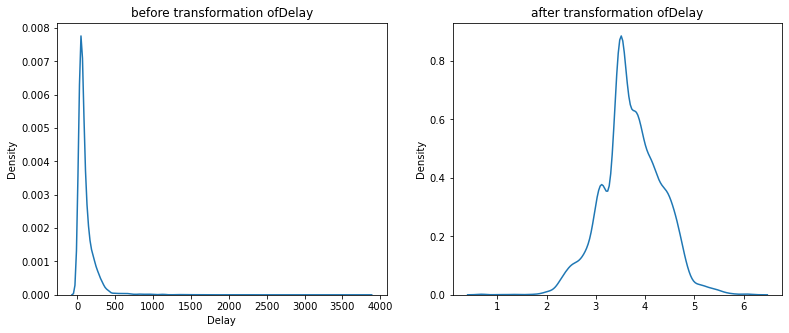

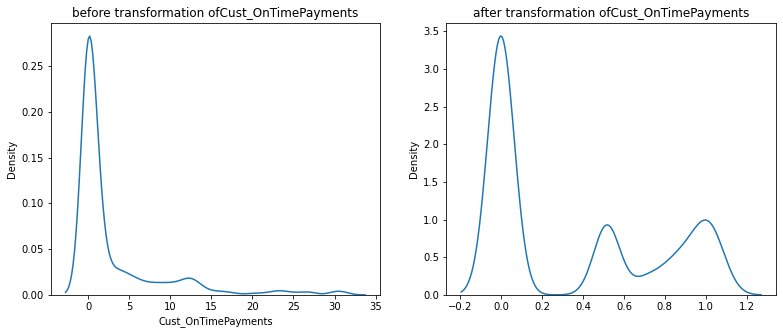

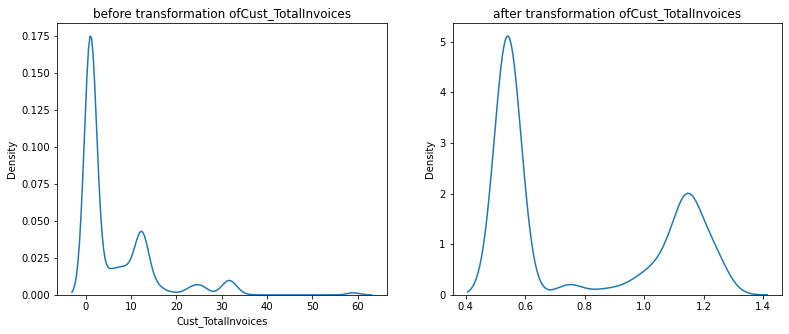

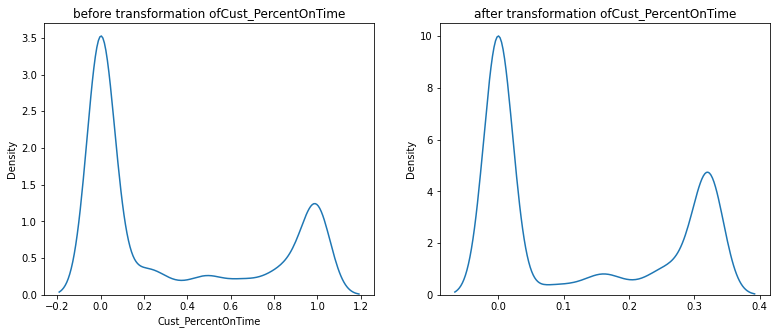

In [47]:
from sklearn.preprocessing import FunctionTransformer
for col in col_num_list:
    plots2(df_full_modified, col, 'boxcox')
    


In [48]:
df_full_transformed = df_full_modified.copy()
for col in col_num_list:
    df_full_transformed[col] = stats.boxcox(df_full_transformed[col]+1)[0]
    

<u>Demonstration of the reduced skewness after boxcox transformation:</u>

In [49]:
print("skewness present in the data is: ")
print(pd.DataFrame(df_full_transformed.skew(), columns=['skewness']))
print( " ")
print("kurtosis present in the data is: ")
print(pd.DataFrame(df_full_transformed.kurtosis(), columns=['kurtosis']))

skewness present in the data is: 
                     skewness
InvoiceID            3.156686
InvoiceBillAmount    0.012558
InvoicePayAmount     0.010466
SalesTax             0.084257
AdminFee            -0.020169
PaymentID            0.003751
ChargeAmount         0.019047
Payment Term        -0.314290
Delay               -0.010205
rowno                0.003611
Cust_OnTimePayments  0.543162
Cust_TotalInvoices   0.466721
Cust_PercentOnTime   0.476951
 
kurtosis present in the data is: 
                      kurtosis
InvoiceID            13.988584
InvoiceBillAmount    -0.313325
InvoicePayAmount     -0.265662
SalesTax             -0.734370
AdminFee              0.395971
PaymentID            -1.241287
ChargeAmount         -0.344692
Payment Term         -1.639480
Delay                 0.533065
rowno                -1.203655
Cust_OnTimePayments  -1.420851
Cust_TotalInvoices   -1.662347
Cust_PercentOnTime   -1.632877


C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\2515548462.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(pd.DataFrame(df_full_transformed.skew(), columns=['skewness']))
C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\2515548462.py:5: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(pd.DataFrame(df_full_transformed.kurtosis(), columns=['kurtosis']))


In [50]:
df_full_transformed.head()

,InvoiceID,InvoiceSequenceID,OMONumber_x,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,PaymentID,ChargeAmount,Payment Term,...,InvoiceDate,DateTransferDoF,DaysDel,ID,Delay,rowno,OMONumber_y,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime
0,1,E701189,E701189,3.192997,3.188591,1.275068,2.338543,612973.0,3.265408,30,...,2006-07-20,2006-10-20,90DayDel,1E701189,3.861433,0,E701189,0.0,0.541428,0.0
1,1,E704942,E704942,2.411519,2.409073,0.723116,2.338543,614364.0,2.835365,30,...,2006-08-25,2006-11-16,60DayDel,1E704942,3.787955,1,E704942,0.0,0.541428,0.0
2,1,E710029,E710029,1.951898,1.950320,0.472277,2.338543,633713.0,2.660932,30,...,2006-10-10,2007-01-19,90DayDel,1E710029,3.927649,2,E710029,0.0,0.541428,0.0
3,1,E712562,E712562,5.121980,5.109763,2.718523,3.334360,635968.0,4.765135,30,...,2006-11-29,2007-01-19,30DayDel,1E712562,3.434334,3,E712562,0.0,0.541428,0.0
4,1,E712358,E712358,2.297860,2.295648,0.656121,2.338543,644697.0,2.786873,30,...,2006-10-11,2007-02-20,90DayDel,1E712358,4.115424,4,E712358,0.0,0.541428,0.0


<u> Z-score to spot outliers in the data </u>

In [51]:
#Using Z scores to detect outliers
# using z score to detect outliers instead of IQR (zscore > 3 is an outlier)
# we use scipy stasts package to get z score.
threshold = 3
outlier_list = {}
outlier_count = {}
for col in col_num_list:
    z = np.abs(stats.zscore(df_full_transformed[col]))
    outlier_each = np.where(z > threshold)
    outlier_list[col] = outlier_each[0]
    outlier_count[col] = len(outlier_each[0])


print("outliers: ", outlier_count)

outliers:  {'InvoiceBillAmount': 22, 'InvoicePayAmount': 23, 'SalesTax': 0, 'AdminFee': 51, 'ChargeAmount': 22, 'Delay': 44, 'Cust_OnTimePayments': 0, 'Cust_TotalInvoices': 0, 'Cust_PercentOnTime': 0}


As the outliers appear to be few, we can just drop them from the data

In [52]:
#Now I would drop these outliers from the training data and replot these box plots
df_full_transformed_backup = df_full_transformed.copy()
common_list = []
for lst in outlier_list.values():
    if len(lst) != 0:
        for item in list(lst):
            common_list.append(item)

print(sorted(set(common_list)))

#finally set(common_list) will have indices of all the outliers that needs to be dropped

[35, 144, 203, 267, 284, 299, 407, 409, 545, 711, 897, 898, 899, 900, 1291, 1420, 1605, 1644, 1725, 1726, 1846, 1863, 1882, 2101, 2275, 2365, 2490, 2710, 2711, 2916, 3161, 3178, 3628, 3629, 3665, 3737, 3854, 3855, 4011, 4346, 4950, 4981, 5257, 5281, 5369, 5504, 5532, 5539, 5541, 5559, 5769, 5770, 5774, 5775, 5776, 6101, 6186, 6199, 6388, 6750, 6831, 7267, 7413, 7441, 7885, 8021, 8082, 8169, 8461, 8505, 8691, 8788, 8926, 9094, 9285, 9401, 9780, 9784, 9802, 9812, 10088, 10149, 10356, 10405, 10513, 10556, 10648, 10727, 10802, 10804, 10902, 11138, 11139, 11182, 11259, 11260, 11261, 11262, 11263, 11378, 11515, 11558]


In [53]:
print(len(set(common_list)))

102


In [54]:
#dropping all the outliers from common list
df_full_outlier_filtered = df_full_transformed.drop(common_list)
df_full_outlier_filtered = df_full_outlier_filtered.reset_index(drop=True)

In [55]:
print(df_full_transformed.shape)
print(df_full_outlier_filtered.shape)

(11579, 21)
(11477, 21)


In [56]:
def plots_box(df, var, df_transformed):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.boxplot(data=df[var])
    plt.title('before removing outliers of ' + str(col))
   
    plt.subplot(122)
    sns.boxplot(data=df_transformed[var])
    plt.title('after removing outliers of '+ str(col))

<u>Demonstration of the outliers before and after dropping them from the features:</u>

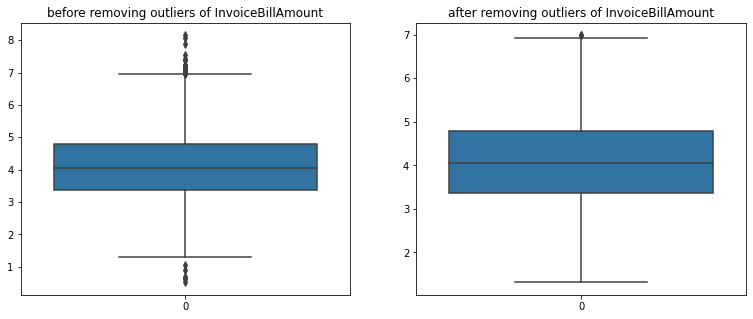

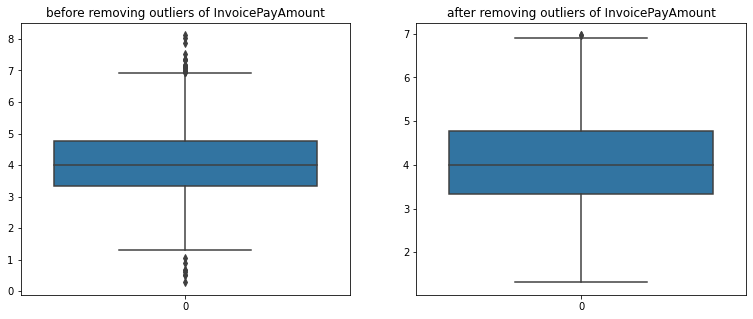

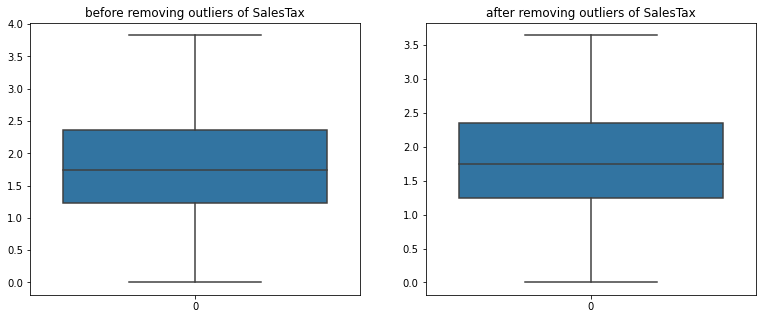

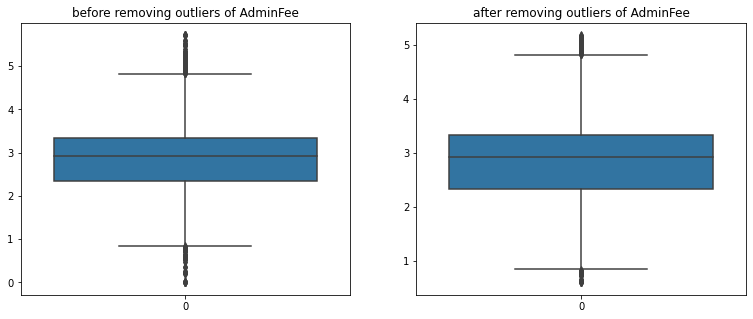

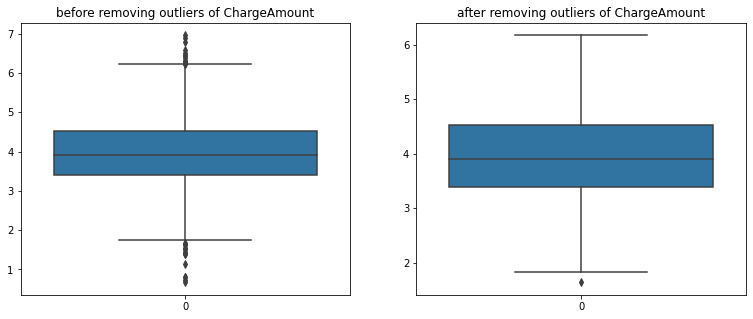

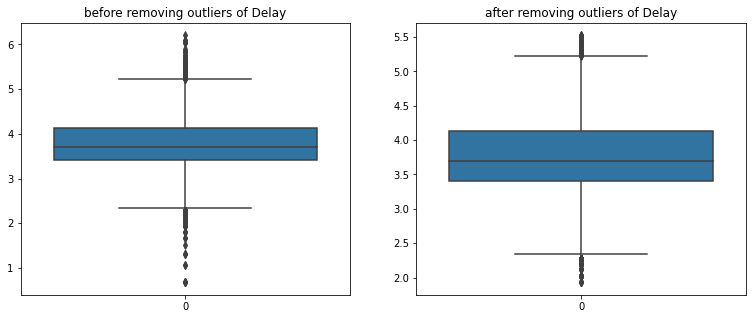

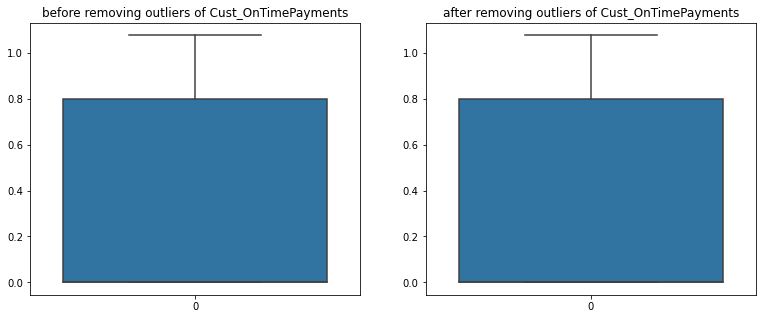

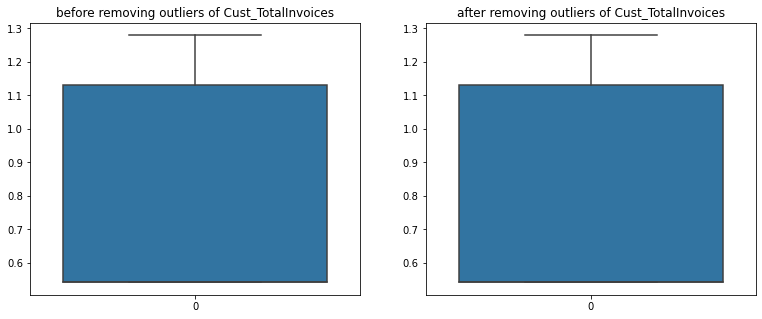

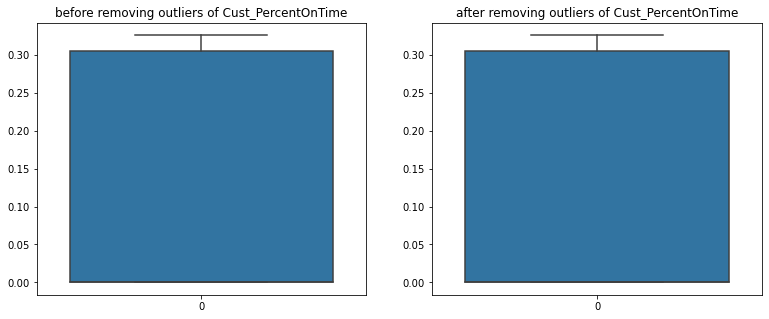

In [57]:
for col in col_num_list:
    plots_box(df_full_transformed, col, df_full_outlier_filtered)

 

<u><b>Dimensionality reduction approaches:</b></u>

1. As the training data include both categorical and numberical variables, mutual information classifier can be used
2. We can also look at the correlation between columns

In [58]:
# dimensionality reduction
# change some data type to string object.
df_full_outlier_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceID            11477 non-null  object        
 1   InvoiceSequenceID    11477 non-null  object        
 2   OMONumber_x          11477 non-null  object        
 3   InvoiceBillAmount    11477 non-null  float64       
 4   InvoicePayAmount     11477 non-null  float64       
 5   SalesTax             11477 non-null  float64       
 6   AdminFee             11477 non-null  float64       
 7   PaymentID            11477 non-null  float64       
 8   ChargeAmount         11477 non-null  float64       
 9   Payment Term         11477 non-null  int64         
 10  InvoiceStatus        11477 non-null  object        
 11  InvoiceDate          11477 non-null  datetime64[ns]
 12  DateTransferDoF      11477 non-null  datetime64[ns]
 13  DaysDel              11477 non-

Lets first factorize the data such that the categorical variables are converted to ordianal variables

In [59]:
#lets factorize columns
#Let us factorize data (we have  binary and nominal categorical variables )
df_factorize = df_full_outlier_filtered.drop(columns=['InvoiceDate', 'DateTransferDoF', 'InvoiceID',
                                                     'InvoiceSequenceID', 'OMONumber_x', 'PaymentID',
                                                     'ID', 'rowno', 'OMONumber_y'])
ncols=df_factorize.columns
for cols in ncols:
    df_factorize[cols],unique=pd.factorize(df_factorize[cols])


In [60]:
df_factorize.head()

,InvoiceBillAmount,InvoicePayAmount,SalesTax,AdminFee,ChargeAmount,Payment Term,InvoiceStatus,DaysDel,Delay,Cust_OnTimePayments,Cust_TotalInvoices,Cust_PercentOnTime
0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,1,1,0,0,0
2,2,2,2,0,2,0,0,0,2,0,0,0
3,3,3,3,1,3,0,1,2,3,0,0,0
4,4,4,4,0,4,0,0,0,4,0,0,0


In [61]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

trainx = df_factorize.drop(columns = ['DaysDel'])
trainy = df_factorize.filter(['DaysDel'])

In [62]:
selector = SelectKBest(mutual_info_classif, k=5).fit(trainx,trainy.to_numpy().flatten())

In [63]:
scores=selector.scores_.tolist()
columns=trainx.columns
selector_scores=pd.DataFrame(columns,columns=["Feature"])
selector_scores["scores"]=scores

In [64]:
selector_scores.sort_values(["scores"], 0, ascending=False)

C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\3541015964.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  selector_scores.sort_values(["scores"], 0, ascending=False)


,Feature,scores
7,Delay,0.548376
10,Cust_PercentOnTime,0.538303
8,Cust_OnTimePayments,0.437452
6,InvoiceStatus,0.425561
4,ChargeAmount,0.311261
1,InvoicePayAmount,0.282848
0,InvoiceBillAmount,0.281473
3,AdminFee,0.208511
2,SalesTax,0.135198
5,Payment Term,0.113081


<font color='green'>Based on the mutual information classifier, we can notice that AdminFee, SalesTax, Payment Term and InvoiceID are less essential features </font> 

Lets check if there is any correlation between numerical variables

<AxesSubplot:>

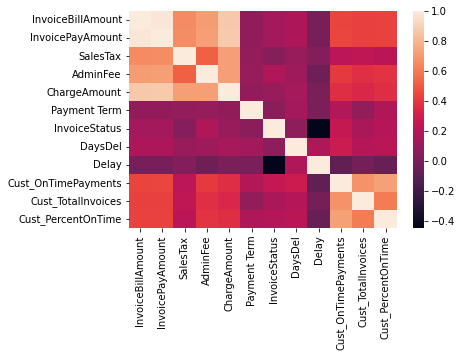

In [65]:
sns.heatmap(df_factorize.corr())

Clearly, InvoiceSequnceID is correlated with OMONumber
InvoiceBillAmount is correlated to InvoicePayAmount

<u><b>Model Building </b></u>

One hot encoder to convert the selected categorical variables to one's or zero's

In [66]:
df_features_select = df_full_outlier_filtered.drop(columns=['InvoiceDate', 'DateTransferDoF', 'InvoiceID',
                                                     'InvoiceSequenceID', 'OMONumber_x', 'PaymentID',
                                                     'ID', 'rowno', 'OMONumber_y', 'Payment Term',
                                                      'Cust_TotalInvoices', 'SalesTax', 'AdminFee', 
                                                      'InvoicePayAmount'])

In [67]:
df_features_select.head()

,InvoiceBillAmount,ChargeAmount,InvoiceStatus,DaysDel,Delay,Cust_OnTimePayments,Cust_PercentOnTime
0,3.192997,3.265408,Dispute,90DayDel,3.861433,0.0,0.0
1,2.411519,2.835365,NotDispute,60DayDel,3.787955,0.0,0.0
2,1.951898,2.660932,Dispute,90DayDel,3.927649,0.0,0.0
3,5.121980,4.765135,NotDispute,30DayDel,3.434334,0.0,0.0
4,2.297860,2.786873,Dispute,90DayDel,4.115424,0.0,0.0


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_features_select.drop('DaysDel', 1), df_features_select['DaysDel'],
                                                    test_size=.2, random_state=40)

C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\2164192294.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df_features_select.drop('DaysDel', 1), df_features_select['DaysDel'],


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9181 entries, 5352 to 11256
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   InvoiceBillAmount    9181 non-null   float64
 1   ChargeAmount         9181 non-null   float64
 2   InvoiceStatus        9181 non-null   object 
 3   Delay                9181 non-null   float64
 4   Cust_OnTimePayments  9181 non-null   float64
 5   Cust_PercentOnTime   9181 non-null   float64
dtypes: float64(5), object(1)
memory usage: 502.1+ KB


In [71]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

train_onehot = ohe.fit_transform(X_train[['InvoiceStatus']])

X_train['rowno'] = [x for x in range(len(X_train))]

df1 = pd.DataFrame(train_onehot, columns=ohe.get_feature_names())
df1['rowno'] = [x for x in range(len(df1))]

x_train = pd.merge(X_train, df1, on='rowno')
x_train = x_train.drop(columns=['InvoiceStatus', 'rowno'])


X_test['rowno'] = [x for x in range(len(X_test))]

test_onehot = ohe.transform(X_test[['InvoiceStatus']])
df2 = pd.DataFrame(test_onehot, columns=ohe.get_feature_names())
df2['rowno'] = [x for x in range(len(df2))]

x_test = pd.merge(X_test, df2, on='rowno')
x_test = x_test.drop(columns=['InvoiceStatus', 'rowno'])


#df_cat_test = pd.concat([X_test, df2], axis=1)
#df_cat_test = df_cat_test.drop(columns=['InvoiceStatus'])

#x_train = df_cat.copy()
#x_test = df_cat_test.copy() 
#pd.concat(test_set_dm2, pd.DataFrame(test_onehot))
#train_set_dm2.info()



C:\Users\venkataramana.s\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\venkataramana.s\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
x_train.head()

,InvoiceBillAmount,ChargeAmount,Delay,Cust_OnTimePayments,Cust_PercentOnTime,x0_Dispute,x0_NotDispute
0,4.824306,4.528141,4.756976,0.000000,0.000000,1.0,0.0
1,5.114272,4.851654,4.876078,1.036149,0.252858,1.0,0.0
2,3.591528,3.518535,2.959261,0.701959,0.252858,0.0,1.0
3,5.091331,4.833579,3.063554,0.000000,0.000000,0.0,1.0
4,3.327599,3.353092,4.244078,0.000000,0.000000,1.0,0.0


In [73]:
x_test.head()

,InvoiceBillAmount,ChargeAmount,Delay,Cust_OnTimePayments,Cust_PercentOnTime,x0_Dispute,x0_NotDispute
0,3.361867,3.358027,3.813349,0.966903,0.304800,0.0,1.0
1,6.879765,6.091523,4.239742,0.000000,0.000000,1.0,0.0
2,5.147000,4.808479,4.634985,0.517788,0.325487,0.0,1.0
3,3.695050,3.692909,4.006792,1.036149,0.252858,1.0,0.0
4,4.924850,4.651846,3.434334,0.000000,0.000000,0.0,1.0


Start with the standard machine learning models and check the accuracy:

<u> Classic Machine Learning classification models:</u>
1. Logistic Regression
2. KNN
3. Decision Tree
4. SVC
5. Naive Bayes

In [74]:
#stacking algorithm using python
#stacking models using python
# reference: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split

def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

Drop the unnecessary features that may overfit the model:

In [75]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9181, 7) (9181,)
(2296, 7) (2296,)


In [76]:
def evaluate_model(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ['precision', 'recall', 'f1-score', 'accuracy']
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs = -1, error_score='raise')
    return scores
    

lr: 0.72 (0.01)
knn: 0.73 (0.01)
cart: 0.74 (0.01)
svm: 0.71 (0.01)
bayes: 0.66 (0.01)


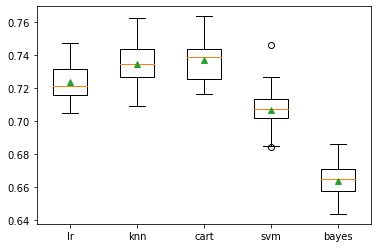

In [77]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    result = evaluate_model(models.get(name), x_train, y_train)
    results.append(result)
    names.append(name)
    print("%s: %0.2f (%0.2f)" %(name, mean(result), std(result)))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [78]:
def model_perf_mult(x,y,model):
    # 1. Model Score
    sc = model.score(x, y.values.ravel())
    print(sc)
    # 2. Confusion Metrics
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y, model.predict(x))
    print(confusion_matrix)
    # 3. Compute Precision, Recall and F-score
    from sklearn.metrics import classification_report
    reprt = classification_report(y, model.predict(x),output_dict=True)
    class_rep = pd.DataFrame(data=reprt)
    print(class_rep)

In [79]:
def plot_multiclass_roc(clf, X_test, y_test, lgbmtype=None, figsize=(17, 6)):
    if lgbmtype == None:
        y_score = clf.predict_proba(X_test)
    else :
        y_score = clf.predict(X_test)
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve,auc
    from sklearn.preprocessing import label_binarize
    # structures
    fpr = dict()
    tpr = dict()
    threshold = dict()
    roc_auc = dict()

   #Binarize the output
    if lgbmtype == None:
        y_test_bin = label_binarize(y_test, classes=clf.classes_)
    else:
        y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
    n_classes = y_test_bin.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], threshold[i]= roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

<u><b>Ensemble methods:</b></u>

1. Random Forest classifier:

In [80]:
#Random forest classfier
import sklearn.ensemble as ens
rf_cl = ens.RandomForestClassifier(n_estimators=100)

In [81]:
result = evaluate_model(rf_cl, x_train, y_train)

In [82]:
result

array([0.76060936, 0.75599129, 0.75708061, 0.75708061, 0.7788671 ,
       0.73529412, 0.75816993, 0.76143791, 0.75272331, 0.77233115,
       0.77149075, 0.75816993, 0.76361656, 0.75272331, 0.75490196,
       0.74618736, 0.74400871, 0.77124183, 0.75272331, 0.75490196,
       0.76605005, 0.75381264, 0.76797386, 0.76906318, 0.75599129,
       0.76906318, 0.76797386, 0.74400871, 0.75272331, 0.76797386])

In [83]:
rf_cl.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [84]:
pred_train = rf_cl.predict(x_train)
print('\nTarget on train data',pred_train)


Target on train data ['90DayDel' '90PDayDel' 'On-Time' ... '90DayDel' '30DayDel' 'On-Time']



Random Forest Model performance on train dataset  : 

0.9855135606143122
[[2851   37    0    2    0]
 [  43 1435   12    2    0]
 [   0   21  607    7    0]
 [   4    0    5 1161    0]
 [   0    0    0    0 2994]]
              30DayDel     60DayDel    90DayDel    90PDayDel  On-Time  \
precision     0.983782     0.961152    0.972756     0.990614      1.0   
recall        0.986505     0.961796    0.955906     0.992308      1.0   
f1-score      0.985142     0.961474    0.964257     0.991460      1.0   
support    2890.000000  1492.000000  635.000000  1170.000000   2994.0   

           accuracy    macro avg  weighted avg  
precision  0.985514     0.981661      0.985501  
recall     0.985514     0.979303      0.985514  
f1-score   0.985514     0.980467      0.985502  
support    0.985514  9181.000000   9181.000000  


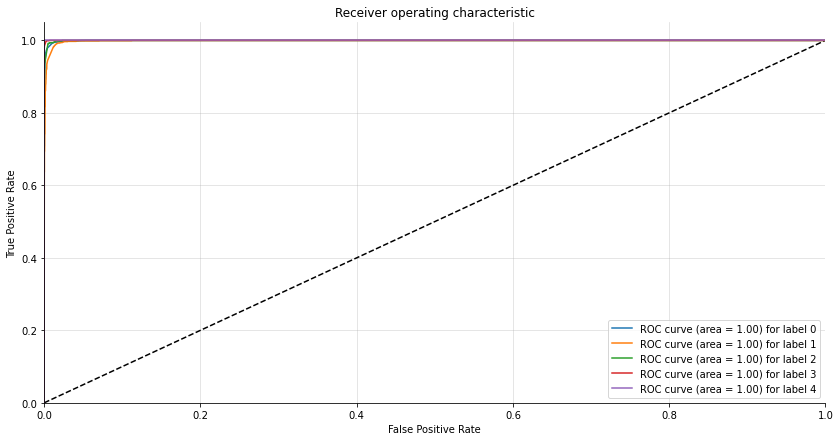

In [85]:
print('\nRandom Forest Model performance on train dataset  : \n')
model_perf_mult(x_train,y_train,rf_cl)
plot_multiclass_roc(rf_cl, x_train, y_train, figsize=(14, 7))


Random Forest Model performance on test dataset  : 

0.7626306620209059
[[554 101   0   6  33]
 [145 167  39  21   1]
 [  0  54  57  48   0]
 [ 10   9  31 231   3]
 [ 43   1   0   0 742]]
             30DayDel    60DayDel    90DayDel   90PDayDel     On-Time  \
precision    0.736702    0.503012    0.448819    0.754902    0.952503   
recall       0.798271    0.447721    0.358491    0.813380    0.944020   
f1-score     0.766252    0.473759    0.398601    0.783051    0.948243   
support    694.000000  373.000000  159.000000  284.000000  786.000000   

           accuracy    macro avg  weighted avg  
precision  0.762631     0.679188      0.754929  
recall     0.762631     0.672377      0.762631  
f1-score   0.762631     0.673981      0.757654  
support    0.762631  2296.000000   2296.000000  


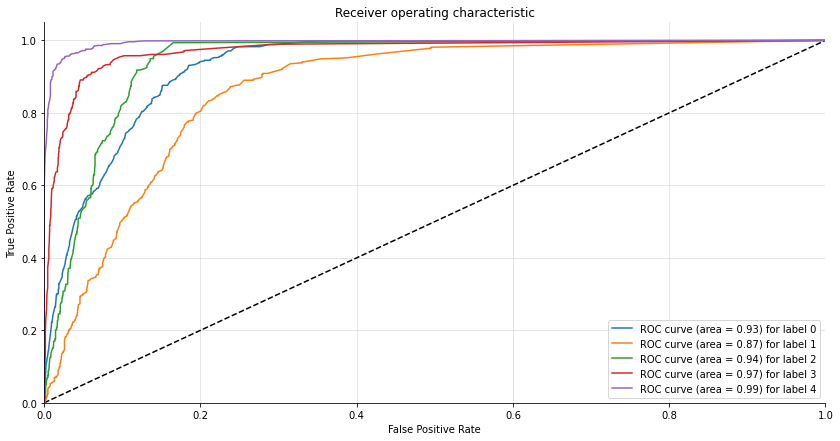

In [86]:
print('\nRandom Forest Model performance on test dataset  : \n')
model_perf_mult(x_test, y_test,rf_cl)
plot_multiclass_roc(rf_cl, x_test, y_test, figsize=(14, 7))

2. XGBoost algorithm

<b><u>Hypertuning of Random Forest using random search technique</u></b>

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
rf_cl = ens.RandomForestClassifier(random_state=35)

In [89]:
#defining the parameters
n_estimators = [int(x) for x in np.linspace(1, 20, num=20)]
max_depth = [int(x) for x in np.linspace(10,120, num=12)]
max_features = ['auto', 'sqrt']
min_samples_split = [2,6,10]
min_samples_leaf = [1,3,4]
bootstrap = [True, False]

In [90]:
random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf, 
              'bootstrap': bootstrap}

In [91]:
rf_random = RandomizedSearchCV(estimator=rf_cl,
                              param_distributions=random_grid,
                              n_iter=100, 
                              cv =5,
                              verbose =2,
                              random_state=35,
                              n_jobs=-1)

In [92]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\venkataramana.s\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=35),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19,
                                                         20]},
                   random_state=35, verbose=2)

In [93]:
print ('Random grid: ', random_grid, '\n')

Random grid:  {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 



In [94]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 12, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}  



<b> Implimenting the best parameters obtained from Random Search</b>

In [95]:
rf_cl = ens.RandomForestClassifier(n_estimators=12, 
                                   min_samples_split=6,
                                   min_samples_leaf=3,
                                   max_features='auto',
                                   max_depth=10,
                                   bootstrap=True,
                                   random_state=35)

In [96]:
rf_cl.fit(x_train,y_train.values.ravel())

C:\Users\venkataramana.s\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=3,
                       min_samples_split=6, n_estimators=12, random_state=35)

In [97]:
pred_train = rf_cl.predict(x_train)
print('\nTarget on train data',pred_train)


Target on train data ['90PDayDel' '90PDayDel' 'On-Time' ... '90DayDel' '30DayDel' 'On-Time']



Random Forest Model performance on train dataset  : 

0.8272519333405947
[[2652  127    0    0  111]
 [ 589  735   90   75    3]
 [   0  136  345  154    0]
 [  74   45   79  959   13]
 [  90    0    0    0 2904]]
              30DayDel     60DayDel    90DayDel    90PDayDel      On-Time  \
precision     0.778855     0.704698    0.671206     0.807239     0.958100   
recall        0.917647     0.492627    0.543307     0.819658     0.969940   
f1-score      0.842573     0.579882    0.600522     0.813401     0.963983   
support    2890.000000  1492.000000  635.000000  1170.000000  2994.000000   

           accuracy    macro avg  weighted avg  
precision  0.827252     0.784020      0.821429  
recall     0.827252     0.748636      0.827252  
f1-score   0.827252     0.760072      0.819017  
support    0.827252  9181.000000   9181.000000  


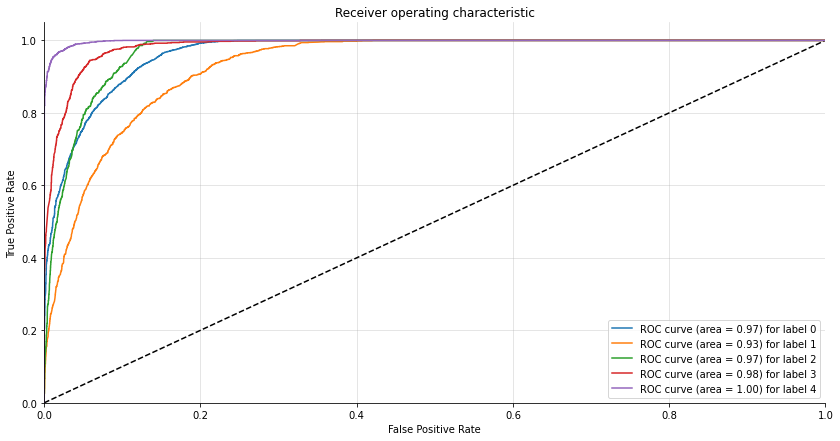

In [98]:
print('\nRandom Forest Model performance on train dataset  : \n')
model_perf_mult(x_train,y_train,rf_cl)
plot_multiclass_roc(rf_cl, x_train, y_train, figsize=(14, 7))


Random Forest Model performance on test dataset  : 

0.7735191637630662
[[611  49   0   0  34]
 [177 139  35  22   0]
 [  0  57  57  45   0]
 [ 20  13  24 224   3]
 [ 41   0   0   0 745]]
             30DayDel    60DayDel    90DayDel   90PDayDel     On-Time  \
precision    0.719670    0.538760    0.491379    0.769759    0.952685   
recall       0.880403    0.372654    0.358491    0.788732    0.947837   
f1-score     0.791964    0.440571    0.414545    0.779130    0.950255   
support    694.000000  373.000000  159.000000  284.000000  786.000000   

           accuracy    macro avg  weighted avg  
precision  0.773519     0.694451      0.760436  
recall     0.773519     0.669624      0.773519  
f1-score   0.773519     0.675293      0.761342  
support    0.773519  2296.000000   2296.000000  


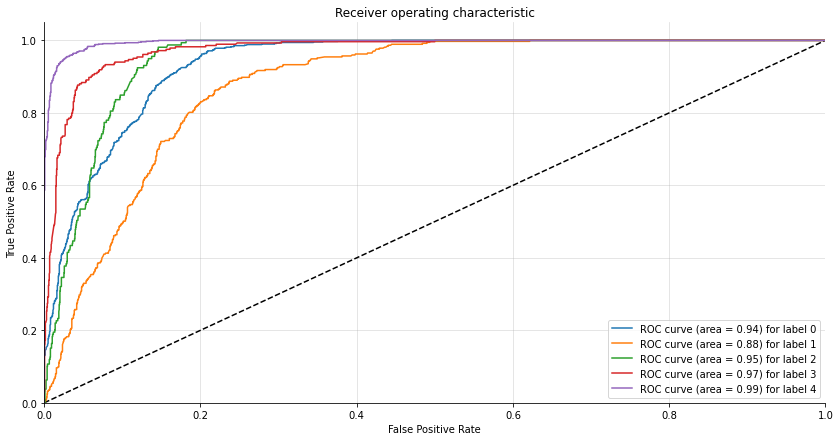

In [107]:
print('\nRandom Forest Model performance on test dataset  : \n')
model_perf_mult(x_test, y_test,rf_cl)
plot_multiclass_roc(rf_cl, x_test, y_test, figsize=(14, 7))

In [111]:
import pickle
filename = "RandomForest_best.pkl"
pickle.dump(rf_cl, open(filename, 'wb'))

In [114]:
test_load = pickle.load(open(filename, 'rb'))
pred_load = test_load.predict(x_test)

array(['On-Time', '90PDayDel', 'On-Time', ..., '90DayDel', '90PDayDel',
       '90DayDel'], dtype=object)

In [115]:
x_test.head()

,InvoiceBillAmount,ChargeAmount,Delay,Cust_OnTimePayments,Cust_PercentOnTime,x0_Dispute,x0_NotDispute
0,3.361867,3.358027,3.813349,0.966903,0.304800,0.0,1.0
1,6.879765,6.091523,4.239742,0.000000,0.000000,1.0,0.0
2,5.147000,4.808479,4.634985,0.517788,0.325487,0.0,1.0
3,3.695050,3.692909,4.006792,1.036149,0.252858,1.0,0.0
4,4.924850,4.651846,3.434334,0.000000,0.000000,0.0,1.0


In [146]:
trial1 = pd.DataFrame()
trial1 = pd.Series({'InvoiceBillAmount': 3.12, 'ChargeAmount': 4.12, 'Delay': 3.12, 'Cust_OnTimePayments': 1.2, 
                    'Cust_PercentOnTime': 1.2, 'Cust_PercentOnTime': 0.5, 'x0_Dispute': 0, 'x0_NotDispute': 1.0})
test_load.predict([trial1])

C:\Users\venkataramana.s\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['On-Time'], dtype=object)

In [106]:
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [101]:
# load dataset
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y)

In [102]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=7, activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, x_train, dummy_y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\venkataramana.s\AppData\Local\Temp\ipykernel_26744\1110704244.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


Baseline: 73.41% (0.89%)


In [103]:
# convert test set
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)

In [104]:
estimator.fit(x_train, dummy_y_train)

In [105]:
model_perf_mult_nn(x_train, encoded_Y, estimator)

NameError: name 'model_perf_mult_nn' is not defined

In [ ]:
plot_multiclass_roc(estimator, x_train, encoded_Y, figsize=(14, 7))

In [ ]:
y_pred = estimator.predict(x_test)

In [ ]:
def model_perf_mult_nn(x,y,model):
    # 1. Model Score
    sc = model.score(x, y)
    print(sc)
    # 2. Confusion Metrics
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y, model.predict(x))
    print(confusion_matrix)
    # 3. Compute Precision, Recall and F-score
    from sklearn.metrics import classification_report
    reprt = classification_report(y, model.predict(x),output_dict=True)
    class_rep = pd.DataFrame(data=reprt)
    print(class_rep)

In [ ]:
model_perf_mult_nn(x_test, encoded_Y_test, estimator)

In [ ]:
plot_multiclass_roc(estimator, x_test, encoded_Y_test, figsize=(14, 7))

<b><u> Hyperparameter tuning of neural networks </b></u>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs, layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'tanh']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=7, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(int(layers1)):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(int(layers2)):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(5, activation='softmax'))
        nn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=123)
    score = cross_val_score(nn, x_train, encoded_Y, scoring='accuracy', cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
# Set paramaters
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 2),
    'optimizer':(0,2),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

In [ ]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'tanh']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

In [ ]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=7, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(5, activation='softmax'))
    nn.compile(loss='categorical_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)
nn.fit(x_train, dummy_y_train, validation_data=(x_test, dummy_y_test), verbose=1)

In [ ]:
y_pred = nn.predict(x_test)

In [ ]:
model_perf_mult_nn(x_train, encoded_Y, nn)

In [ ]:
plot_multiclass_roc(nn, x_train, encoded_Y, figsize=(14, 7))

In [ ]:
model_perf_mult_nn(x_test, encoded_Y_test, nn)

In [ ]:
plot_multiclass_roc(estimator, x_test, encoded_Y_test, figsize=(14, 7))